In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2023-08-02 11:09:27.217601: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-08-02 11:09:39--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.008s  

2023-08-02 11:09:39 (6.29 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [4]:
# Split X & y 
X = dataset.drop(columns="expenses")
y = dataset.expenses

In [7]:
# Test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [104]:
# Transform categorical data
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


cat_features = ["sex", "children", "smoker", "region"]
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))
preproc_pipeline = make_column_transformer((cat_pipeline, cat_features),
                                           remainder="passthrough")

preproc_pipeline.fit(X_train)
train_dataset = preproc_pipeline.transform(X_train)
test_dataset = preproc_pipeline.transform(X_test)
train_labels = y_train
test_labels = y_test


In [105]:
train_dataset.shape[1]

16

In [106]:
# Model 

model = keras.Sequential([layers.Dense(128, input_shape = (16,)), 
                          layers.Dense(64),
                          layers.Dropout(0.2),
                          layers.Dense(64),
                          layers.Dropout(0.2),
                          layers.Dense(1)
])

model.compile(
    optimizer="adam",
    loss="mae",
    metrics=["mae", "mse"]
)

model.build()

In [107]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 128)               2176      
                                                                 
 dense_69 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_70 (Dense)            (None, 64)                4160      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_71 (Dense)            (None, 1)                 65        
                                                                 
Total params: 14657 (57.25 KB)
Trainable params: 1465

In [108]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 10,
                   restore_best_weights = True)

In [109]:
history = model.fit(train_dataset, 
                    train_labels, 
                    epochs=1000,
                    validation_split=0.3,
                    callbacks=[es])

Epoch 1/1000
24/24 [==============================] - 1s 11ms/step - loss: 12889.7900 - mae: 12889.7900 - mse: 312115168.0000 - val_loss: 13535.1445 - val_mae: 13535.1445 - val_mse: 326276032.0000
Epoch 2/1000
24/24 [==============================] - 0s 4ms/step - loss: 11606.4004 - mae: 11606.4004 - mse: 277757760.0000 - val_loss: 10897.7676 - val_mae: 10897.7676 - val_mse: 255642976.0000
Epoch 3/1000
24/24 [==============================] - 0s 4ms/step - loss: 8056.9360 - mae: 8056.9360 - mse: 181290288.0000 - val_loss: 8166.3491 - val_mae: 8166.3491 - val_mse: 148984288.0000
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 7484.4399 - mae: 7484.4399 - mse: 150238864.0000 - val_loss: 8079.1753 - val_mae: 8079.1753 - val_mse: 170687056.0000
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 7327.9961 - mae: 7327.9961 - mse: 156066464.0000 - val_loss: 7938.3994 - val_mae: 7938.3994 - val_mse: 163401264.0000
Epoch 6/1000
24/24 [===========

9/9 - 0s - loss: 3445.5657 - mae: 3445.5657 - mse: 40416268.0000 - 65ms/epoch - 7ms/step
Testing set Mean Abs Error: 3445.57 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


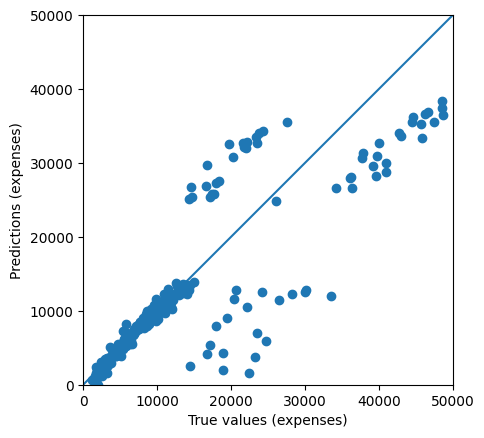

In [110]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
